In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

path="D://Téléchargement//QueryResults.csv"

data=pd.read_csv(path)

Fonctions de nettoyage de texte

In [90]:
data=data[:5000]
# Tokenizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [91]:
data_T=data.loc[:,['Title','Body','Tags']]

def tokenizer_fct(sentence) :
    sentence_clean = sentence.replace('+', 'plus').replace('/', ' ').replace('#', 'sharp')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@"))
                                       and (not w.startswith("http"))]
    return lw


# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def noun_extract(text):
    tokens = nltk.word_tokenize(text)
    tags_pos = nltk.pos_tag(tokens)
    nouns = [word for word,pos in tags_pos if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
    return(' '.join(nouns).lower())

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    nouns=noun_extract(desc_text)
    word_tokens = tokenizer_fct(nouns)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    nouns=noun_extract(desc_text)
    word_tokens = tokenizer_fct(nouns)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    nouns=noun_extract(desc_text)
    word_tokens = tokenizer_fct(nouns)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [92]:
data_T['Body'] =data_T['Title'] + ' ' + data_T['Body']
datacopy=data_T.copy()

,Title,Body,Tags
0,Heap corruption under Win32; how to locate?,<p>I'm working on a <strong>multithreaded</str...,<c++><windows><multithreading><debugging><memory>
1,Rails: How to set a background image in rails ...,<p>I am using rails 3.2 and i have to set a ba...,<css><ruby-on-rails><ruby-on-rails-3><ruby-on-...
2,Create a directly-executable cross-platform GU...,<p>Python works on multiple platforms and can ...,<python><user-interface><deployment><tkinter><...
3,How do I make event callbacks into my win form...,<p>When you subscribe to an event on an object...,<c#><.net><winforms><multithreading><events>
4,Pandas OHLC aggregation on OHLC data,<p>I understand that OHLC re-sampling of time ...,<python><python-2.7><pandas><dataframe><resamp...
...,...,...,...
4995,Entity Framework Code First Fluent Api: Adding...,<p>I'm running EF 4.2 CF and want to create in...,<c#><entity-framework-4><ef-code-first><data-a...
4996,IIS Returning Old User Names to my application,<p>Here's my scenario. I created an applicati...,<asp.net><security><iis><authentication><kerbe...
4997,"AtomicReferenceFieldUpdater - methods set, get...","<p><a href=""http://docs.oracle.com/javase/6/do...",<java><concurrency><volatile><atomicreference>...
4998,how to return json encoded form errors in symfony,<p>I want to create a webservice to which I su...,<php><ajax><json><forms><symfony>


In [93]:
data_T

In [94]:
import re
listebalise=['<p>','</p>','<pre>','</pre>','<code>','</code>','<strong>','</strong>','<em>','</em>','<mark>','</mark>','<ul>','</ul>','<ol>','</ol>','<br>','\n','<blockquote>','</blockquote>']
for k in range(len(data_T)):
    result_test=re.split('<code>(.*)</code>',datacopy['Body'][k])
    if len(result_test)==1:
        datacopy['Body'][k]=result_test[0]
    else:
        datacopy['Body'][k]=' '.join([result_test[2*i] for i in range(len(result_test)//2)])
    result_test=re.split('<li>(.*)</li>',datacopy['Body'][k])
    if len(result_test)==1:
        datacopy['Body'][k]=result_test[0]
    else:
        datacopy['Body'][k]=' '.join([result_test[2*i] for i in range(len(result_test)//2)])
    temp=datacopy['Body'][k]
    for i in listebalise:
        temp=temp.replace(i," ")
    data_T['Body'][k]=temp

In [95]:
data_T

,Title,Body,Tags,sentence_bow,sentence_bow_lem,sentence_dl,tags
0,Heap corruption under Win32; how to locate?,<p>I'm working on a <strong>multithreaded</str...,<c++><windows><multithreading><debugging><memory>,heap corruption win32 locate working strong mu...,heap corruption win32 locate working strong mu...,heap corruption under win32 ; how to locate ? ...,"[c++, windows, multithreading, debugging, memory]"
1,Rails: How to set a background image in rails ...,<p>I am using rails 3.2 and i have to set a ba...,<css><ruby-on-rails><ruby-on-rails-3><ruby-on-...,rails how set background image rails css using...,rail how set background image rail cs using ra...,rails : how to set a background image in rails...,"[css, ruby-on-rails, ruby-on-rails-3, ruby-on-..."
2,Create a directly-executable cross-platform GU...,<p>Python works on multiple platforms and can ...,<python><user-interface><deployment><tkinter><...,create directly executable cross platform gui ...,create directly executable cross platform gui ...,create a directly executable cross platform gu...,"[python, user-interface, deployment, tkinter, ..."
3,How do I make event callbacks into my win form...,<p>When you subscribe to an event on an object...,<c#><.net><winforms><multithreading><events>,how make event callbacks win forms thread safe...,how make event callback win form thread safe w...,how do i make event callbacks into my win form...,"[c, #, .net, winforms, multithreading, events]"
4,Pandas OHLC aggregation on OHLC data,<p>I understand that OHLC re-sampling of time ...,<python><python-2.7><pandas><dataframe><resamp...,pandas ohlc aggregation ohlc data understand o...,panda ohlc aggregation ohlc data understand oh...,pandas ohlc aggregation on ohlc data p i under...,"[python, python-2.7, pandas, dataframe, resamp..."
...,...,...,...,...,...,...,...
4995,Entity Framework Code First Fluent Api: Adding...,<p>I'm running EF 4.2 CF and want to create in...,<c#><entity-framework-4><ef-code-first><data-a...,entity framework code first fluent api adding ...,entity framework code first fluent api adding ...,entity framework code first fluent api : addin...,"[c, #, entity-framework-4, ef-code-first, data..."
4996,IIS Returning Old User Names to my application,<p>Here's my scenario. I created an applicati...,<asp.net><security><iis><authentication><kerbe...,iis returning old user names application here ...,ii returning old user name application here sc...,iis returning old user names to my application...,"[asp.net, security, iis, authentication, kerbe..."
4997,"AtomicReferenceFieldUpdater - methods set, get...","<p><a href=""http://docs.oracle.com/javase/6/do...",<java><concurrency><volatile><atomicreference>...,atomicreferencefieldupdater methods set get co...,atomicreferencefieldupdater method set get com...,"atomicreferencefieldupdater methods set , get ...","[java, concurrency, volatile, atomicreference,..."
4998,how to return json encoded form errors in symfony,<p>I want to create a webservice to which I su...,<php><ajax><json><forms><symfony>,return json encoded form errors symfony want c...,return json encoded form error symfony want cr...,how to return json encoded form errors in symf...,"[php, ajax, json, forms, symfony]"


In [96]:
data_T['sentence_bow'] = data_T['Body'].apply(lambda x : transform_bow_fct(x))
data_T['sentence_bow_lem'] = data_T['Body'].apply(lambda x : transform_bow_lem_fct(x))
data_T['sentence_dl'] = data_T['Body'].apply(lambda x : transform_dl_fct(x))

In [97]:
from collections import Counter
def tokenizer_fct_tags(sentence) :
    sentence_clean = sentence.replace('<', ' ').replace('>', ' ').replace('+', 'plus')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens


data_T['tags']=data['Tags'].apply(lambda x : tokenizer_fct_tags(x))


list_of_tags = []
for item in data_T['tags']:
    for word in item:
        if not word in list_of_tags:
            list_of_tags.append(word)


list_of_all_tags = []
for item in data_T['tags']:
    for word in item:
        list_of_all_tags.append(word)

Counter({'c++': 462,
         'windows': 0,
         'multithreading': 108,
         'debugging': 54,
         'memory': 117,
         'css': 129,
         'ruby-on-rails': 0,
         'ruby-on-rails-3': 3,
         'ruby-on-rails-3.2': 0,
         'background-image': 0,
         'python': 580,
         'user-interface': 0,
         'deployment': 18,
         'tkinter': 0,
         'release-management': 0,
         'c': 802,
         '#': 632,
         '.net': 837,
         'winforms': 0,
         'events': 51,
         'python-2.7': 0,
         'pandas': 0,
         'dataframe': 0,
         'resampling': 1,
         'javascript': 0,
         'internet-explorer': 0,
         'firebug': 8,
         'javascript-debugger': 0,
         '.net-3.5': 0,
         'wia': 1,
         'image-scanner': 0,
         'linux': 182,
         'bash': 84,
         'unix': 64,
         'coredump': 0,
         'tcsh': 2,
         'svn': 25,
         'testing': 113,
         'revision': 0,
         'version

In [98]:
data_T

most_occurs [('c++', 462), ('multithreading', 108), ('memory', 117), ('css', 129), ('python', 580), ('c', 802), ('#', 632), ('.net', 837), ('linux', 182), ('bash', 84), ('testing', 113), ('visual-studio', 137), ('oop', 104), ('android', 510), ('java', 1065), ('xml', 92), ('process', 109), ('algorithm', 116), ('html', 253), ('sql', 576), ('image', 132), ('wpf', 92), ('arrays', 82), ('string', 158), ('ruby', 211), ('object', 300), ('php', 197), ('date', 113), ('ios', 479), ('xcode', 133), ('list', 91), ('service', 94), ('iphone', 304), ('struct', 98), ('ase', 207), ('json', 93), ('http', 151), ('django', 114), ('com', 286), ('map', 111), ('api', 104), ('cocoa', 161), ('jquery', 237), ('spring', 151), ('text', 93), ('file', 173), ('sign', 104), ('swift', 88), ('view', 157), ('orm', 340), ('uri', 95), ('git', 109), ('int', 341), ('ram', 214), ('ear', 97), ('ria', 116), ('mat', 128), ('window', 181), ('web', 94), ('out', 101), ('pac', 116)]


In [99]:
counts = Counter(list_of_all_tags)
l2=list_of_tags.copy()
for k in l2:
    for i in list_of_tags:
        if k in i and k!=i and len(k)>2:
            counts[k]+=counts[i]
            counts[i]=0
            list_of_tags.remove(i)

25646


In [100]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data2 = data_T.sentence_bow.values.tolist()
data_words = list(sent_to_words(data2))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

,Title,Body,Tags,sentence_bow,sentence_bow_lem,sentence_dl,tags
0,Heap corruption under Win32; how to locate?,<p>I'm working on a <strong>multithreaded</str...,<c++><windows><multithreading><debugging><memory>,heap corruption win32 locate working strong mu...,heap corruption win32 locate working strong mu...,heap corruption under win32 ; how to locate ? ...,c++
1,Rails: How to set a background image in rails ...,<p>I am using rails 3.2 and i have to set a ba...,<css><ruby-on-rails><ruby-on-rails-3><ruby-on-...,rails how set background image rails css using...,rail how set background image rail cs using ra...,rails : how to set a background image in rails...,css
2,Create a directly-executable cross-platform GU...,<p>Python works on multiple platforms and can ...,<python><user-interface><deployment><tkinter><...,create directly executable cross platform gui ...,create directly executable cross platform gui ...,create a directly executable cross platform gu...,python
3,How do I make event callbacks into my win form...,<p>When you subscribe to an event on an object...,<c#><.net><winforms><multithreading><events>,how make event callbacks win forms thread safe...,how make event callback win form thread safe w...,how do i make event callbacks into my win form...,c
4,Pandas OHLC aggregation on OHLC data,<p>I understand that OHLC re-sampling of time ...,<python><python-2.7><pandas><dataframe><resamp...,pandas ohlc aggregation ohlc data understand o...,panda ohlc aggregation ohlc data understand oh...,pandas ohlc aggregation on ohlc data p i under...,python
...,...,...,...,...,...,...,...
4995,Entity Framework Code First Fluent Api: Adding...,<p>I'm running EF 4.2 CF and want to create in...,<c#><entity-framework-4><ef-code-first><data-a...,entity framework code first fluent api adding ...,entity framework code first fluent api adding ...,entity framework code first fluent api : addin...,c
4996,IIS Returning Old User Names to my application,<p>Here's my scenario. I created an applicati...,<asp.net><security><iis><authentication><kerbe...,iis returning old user names application here ...,ii returning old user name application here sc...,iis returning old user names to my application...,other
4997,"AtomicReferenceFieldUpdater - methods set, get...","<p><a href=""http://docs.oracle.com/javase/6/do...",<java><concurrency><volatile><atomicreference>...,atomicreferencefieldupdater methods set get co...,atomicreferencefieldupdater method set get com...,"atomicreferencefieldupdater methods set , get ...",java
4998,how to return json encoded form errors in symfony,<p>I want to create a webservice to which I su...,<php><ajax><json><forms><symfony>,return json encoded form errors symfony want c...,return json encoded form error symfony want cr...,how to return json encoded form errors in symf...,php


In [101]:
datawords=[]
for k in data_words:
    datawords+=k

60

In [102]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = Counter(datawords)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate_from_frequencies(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [103]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

In [ ]:
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=20, limit=60, step=5)

In [104]:
limit=60; start=20; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


catégories :  ['c++', 'multithreading', 'memory', 'css', 'python', 'c', '.net', 'linux', 'bash', 'testing', 'visual-studio', 'oop', 'android', 'java', 'xml', 'process', 'algorithm', 'html', 'sql', 'image', 'wpf', 'arrays', 'string', 'ruby', 'object', 'php', 'date', 'ios', 'xcode', 'list', 'service', 'iphone', 'struct', 'ase', 'json', 'http', 'django', 'com', 'map', 'api', 'cocoa', 'jquery', 'spring', 'text', 'file', 'sign', 'swift', 'view', 'orm', 'uri', 'git', 'int', 'ram', 'ear', 'ria', 'mat', 'window', 'web', 'out', 'pac', 'other']


In [105]:
from pprint import pprint
# number of topics
num_topics = start+np.argmax(coherence_values)
print('Number of topics : ' + str(num_topics))
# LDA model
lda_model = model_list[np.argmax(coherence_values)]
# Print the Keyword in the topics
pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]



max length bow lem :  1808
max length dl :  4674


In [106]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = " ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Title,Body,Tags,sentence_bow,sentence_bow_lem,sentence_dl,tags,length_bow_lem,length_dl
0,Heap corruption under Win32; how to locate?,<p>I'm working on a <strong>multithreaded</str...,<c++><windows><multithreading><debugging><memory>,heap corruption win32 locate working strong mu...,heap corruption win32 locate working strong mu...,heap corruption under win32 ; how to locate ? ...,c++,458,960
1,Rails: How to set a background image in rails ...,<p>I am using rails 3.2 and i have to set a ba...,<css><ruby-on-rails><ruby-on-rails-3><ruby-on-...,rails how set background image rails css using...,rail how set background image rail cs using ra...,rails : how to set a background image in rails...,css,46,105
2,Create a directly-executable cross-platform GU...,<p>Python works on multiple platforms and can ...,<python><user-interface><deployment><tkinter><...,create directly executable cross platform gui ...,create directly executable cross platform gui ...,create a directly executable cross platform gu...,python,38,85
3,How do I make event callbacks into my win form...,<p>When you subscribe to an event on an object...,<c#><.net><winforms><multithreading><events>,how make event callbacks win forms thread safe...,how make event callback win form thread safe w...,how do i make event callbacks into my win form...,c,52,115
4,Pandas OHLC aggregation on OHLC data,<p>I understand that OHLC re-sampling of time ...,<python><python-2.7><pandas><dataframe><resamp...,pandas ohlc aggregation ohlc data understand o...,panda ohlc aggregation ohlc data understand oh...,pandas ohlc aggregation on ohlc data p i under...,python,224,400
...,...,...,...,...,...,...,...,...,...
4995,Entity Framework Code First Fluent Api: Adding...,<p>I'm running EF 4.2 CF and want to create in...,<c#><entity-framework-4><ef-code-first><data-a...,entity framework code first fluent api adding ...,entity framework code first fluent api adding ...,entity framework code first fluent api : addin...,c,183,397
4996,IIS Returning Old User Names to my application,<p>Here's my scenario. I created an applicati...,<asp.net><security><iis><authentication><kerbe...,iis returning old user names application here ...,ii returning old user name application here sc...,iis returning old user names to my application...,other,252,534
4997,"AtomicReferenceFieldUpdater - methods set, get...","<p><a href=""http://docs.oracle.com/javase/6/do...",<java><concurrency><volatile><atomicreference>...,atomicreferencefieldupdater methods set get co...,atomicreferencefieldupdater method set get com...,"atomicreferencefieldupdater methods set , get ...",java,167,344
4998,how to return json encoded form errors in symfony,<p>I want to create a webservice to which I su...,<php><ajax><json><forms><symfony>,return json encoded form errors symfony want c...,return json encoded form error symfony want cr...,how to return json encoded form errors in symf...,php,152,454


In [107]:
data_T['keywords_bow']=df_dominant_topic['Keywords']

array(['c++', 'css', 'python', ..., 'java', 'php', 'python'], dtype=object)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_T['sentence_bow_lem'])
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [ ]:
data_T['keywords_bow_lem']=df_dominant_topic['Keywords']

In [108]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_T['sentence_dl'])
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
data_T['keywords_dl']=df_dominant_topic['Keywords']

In [109]:
# Join the different processed titles together.
long_string = ''.join(list(data_T['keywords_bow_lem'].values))
long_string=Counter(long_string.split(sep=' '))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate_from_frequencies(long_string)
# Visualize the word cloud
wordcloud.to_image()

C:\Users\antoi\PycharmProjects\Projet 5\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,00000,00000000,0000000000000001,0000000000000042,0000000000000047,0000000000000050,0000000000000055,...,привет,разведчик,стратегический,ברי,צקלה,السلام,عليكم,दय,ﬂexible,𝟘𝟙𝟚𝟛𝟜𝟝𝟞𝟟𝟠𝟡
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
data_T

C:\Users\antoi\PycharmProjects\Projet 5\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,00000,00000000,0000000000000001,0000000000000042,0000000000000047,0000000000000050,0000000000000055,...,привет,разведчик,стратегический,ברי,צקלה,السلام,عليكم,दय,ﬂexible,𝟘𝟙𝟚𝟛𝟜𝟝𝟞𝟟𝟠𝟡
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.275394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
most_occurs = [(k, v) for k, v in counts.most_common()[:num_topics]]
print("most_occurs", most_occurs)

tags = []
for item in most_occurs:
    tags.append(item[0])
tags.remove('#')
for item in data_T['tags']:
    len_item=len(item)
    k=0
    while k < len_item:
        if (item[k] not in tags):
            del item[k]
            len_item-=1
            k-=1
        k+=1
    if item==[]:
        item.append('other')

for k in range(len(data_T)):
    data_T['tags'][k]=data_T['tags'][k][0]

In [111]:
cpt=0
for k in counts:
    cpt+=counts[k]
print(cpt)

In [ ]:
data_T

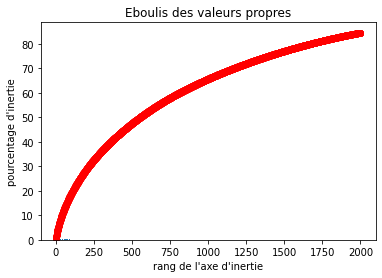

In [112]:
len(tags)

In [ ]:
import logging


logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


## Lecture dataset

In [ ]:
tags.append('other')
l_cat = tags
print("catégories : ", l_cat)
y_cat_num = [(l_cat.index(data_T['tags'][i])) for i in range(len(data_T))]

In [114]:
from nltk.tokenize import sent_tokenize, word_tokenize

data_T['length_bow'] = data_T['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_T['length_bow'].max())
data_T['length_bow_lem'] = data_T['sentence_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length bow lem : ", data_T['length_bow_lem'].max())
data_T['length_dl'] = data_T['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_T['length_dl'].max())

In [ ]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(data_T[feat])
ctf_fit = ctf.fit(data_T[feat])

cv_transform = cvect.transform(data_T[feat])
ctf_transform = ctf.transform(data_T[feat])

In [115]:
df_bowcv=pd.DataFrame(cv_transform.toarray(),columns=cvect.get_feature_names())
df_bowcv

In [116]:
df_bowctf=pd.DataFrame(ctf_transform.toarray(),columns=ctf.get_feature_names())
df_bowctf

Build & train Word2Vec model ...
Vocabulary size: 29933
Word2Vec trained


Fonction pour réaliser l'ACP

In [ ]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

ACP pour le bag of words CountVectorizer

In [ ]:
from sklearn import decomposition
from sklearn import preprocessing


# choix du nombre de composantes à calculer


# préparation des données pour l'ACP
X = df_bowcv.values
features = df_bowcv.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaledcv = std_scale.transform(X)

# Calcul des composantes principales
pcacv = decomposition.PCA()
pcacv.fit_transform(X_scaledcv)

# Eboulis des valeurs propres
display_scree_plot(pcacv)

plt.show()

ACP pour le bag of words Tf-idf

In [120]:
from sklearn import decomposition
from sklearn import preprocessing


# choix du nombre de composantes à calculer


# préparation des données pour l'ACP
X = df_bowctf.values
features = df_bowctf.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaledctf = std_scale.transform(X)

# Calcul des composantes principales
pcactf = decomposition.PCA()
pcactf.fit_transform(X_scaledctf)

# Eboulis des valeurs propres
display_scree_plot(pcactf)

plt.show()

157/157 [==============================] - 0s 2ms/step


(5000, 500)

## Export du DataFrame

In [121]:
data_T.dropna(axis=0,inplace=True)

In [122]:
data_T.isnull().mean()

2.9.0
2.9.0
Num GPUs Available:  0
True


In [ ]:
data_T.to_csv('C://Users//antoi//Dropbox//PC//Desktop//Projet 5//data_T.csv')

In [123]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook(local=True)


vis=gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.show(vis,local=False)